In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as r
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('dataset/Biomass_History.csv')

In [3]:
print(df)

      Index  Latitude  Longitude       2010       2011       2012       2013   
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016  

In [4]:
copy_df = df.copy()

In [5]:
df = df.drop(['Latitude', 'Longitude'], axis=1)


In [6]:
df_unrolled = df.melt(id_vars=['Index'], var_name='Year')

In [7]:
print(df_unrolled)

       Index  Year      value
0          0  2010   8.475744
1          1  2010  24.029778
2          2  2010  44.831635
3          3  2010  59.974419
4          4  2010  14.653370
...      ...   ...        ...
19339   2413  2017   5.321604
19340   2414  2017   0.120626
19341   2415  2017   0.038879
19342   2416  2017   1.304297
19343   2417  2017   0.226953

[19344 rows x 3 columns]


In [8]:
df_one_hot_encoded = pd.get_dummies(df_unrolled, columns = ['Index'])

In [9]:
print(df_one_hot_encoded)

       Year      value  Index_0  Index_1  Index_2  Index_3  Index_4  Index_5   
0      2010   8.475744     True    False    False    False    False    False  \
1      2010  24.029778    False     True    False    False    False    False   
2      2010  44.831635    False    False     True    False    False    False   
3      2010  59.974419    False    False    False     True    False    False   
4      2010  14.653370    False    False    False    False     True    False   
...     ...        ...      ...      ...      ...      ...      ...      ...   
19339  2017   5.321604    False    False    False    False    False    False   
19340  2017   0.120626    False    False    False    False    False    False   
19341  2017   0.038879    False    False    False    False    False    False   
19342  2017   1.304297    False    False    False    False    False    False   
19343  2017   0.226953    False    False    False    False    False    False   

       Index_6  Index_7  ...  Index_240

In [10]:
df_all_2018 = copy_df.copy()
df_all_2018['2018'] = df_all_2018[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].mean(axis = 1)
df_2018 = df_all_2018.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], axis = 1)
df_2018_unrolled = df_2018.melt(id_vars=['Index', 'Latitude', 'Longitude'], var_name='Year')
df_2018_one_hot_encoded = pd.get_dummies(df_2018_unrolled, columns = ['Index'])

In [11]:
print(df_all_2018.head())
print(df_2018.head())
print(df_2018_unrolled.head())
print(df_2018_one_hot_encoded.head())

   Index  Latitude  Longitude       2010       2011       2012       2013   
0      0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1      1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017       2018  
0  10.788374   6.647325   7.387925    5.180296   7.821685  
1  34.419411  27.361908  40.431847   42.126945  30.552764  
2  70.917908  42.517117  59.181629   73.203232  58.343585  
3  93.513924  70.203171  74.536720  101.067352  77.779249  
4  19.534035  19.165791  16.531315   26.086885  19.390831  
   Index  Latitude  Longitude       2018
0      0  24.66818   71.33144   7.821685
1      1  24.66818   71.41106  30.552764
2      2  24.66818   71.49069  58.343585
3      3  24.

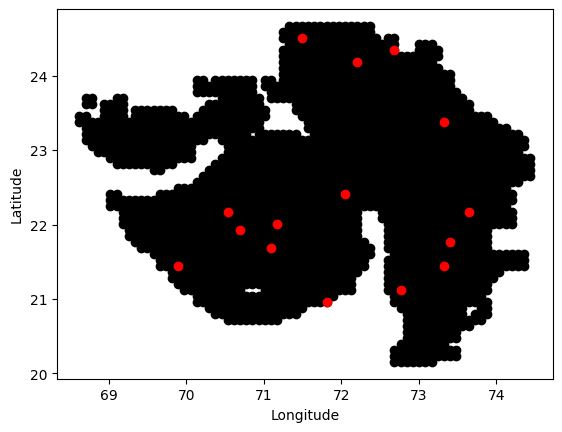

In [91]:
K = 15
Centroids = (df_2018.sample(n=K))
plt.scatter(df_2018['Longitude'],df_2018["Latitude"],c='black')
plt.scatter(Centroids["Longitude"],Centroids["Latitude"],c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<generator object DataFrame.iterrows at 0x000001B03B0106A0>


In [94]:
diff = 1
j=0

while(diff!=0):
    XD=df_2018
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Longitude"]-row_d["Longitude"])**2
            d2=(row_c["Latitude"]-row_d["Latitude"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df_2018[i]=ED
        i=i+1

    C=[]
    for index,row in df_2018.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df_2018["Cluster"]=C
    Centroids_new = df_2018.groupby(["Cluster"]).mean()[["Latitude","Longitude"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Latitude'] - Centroids['Latitude']).sum() + (Centroids_new['Longitude'] - Centroids['Longitude']).sum()
        print(diff.sum())
    Centroids = df_2018.groupby(["Cluster"]).mean()[["Latitude","Longitude"]]

0.14633628147245403
0.18295924472879221
0.024166830117618332
-0.1499641353563348
-0.19139307753466994
-0.09257737939100963
-0.004071001988020129
0.01001598333618503
0.020850462274115245
0.05895598906989363
0.07484555899184642
0.0809522873948545
0.06978720344982392
0.012393994813017173
0.04405287820826942
0.04416228565081326
0.05038546872595617
0.02976373748590433
0.021780480446746964
0.015387070991479845
0.013399547631362196
0.021070599679749336
0.008032226503878803
0.007678862209452575
0.007728542288042206
0.013786128168785439
0.01606603057057754
0.014814932193573327
0.014698625538535737
0.020317697466648355
0.006819547501500267
0.008344014555252244
0.026048419026793113
0.01381689138421649
0.00919592795746027
0.0


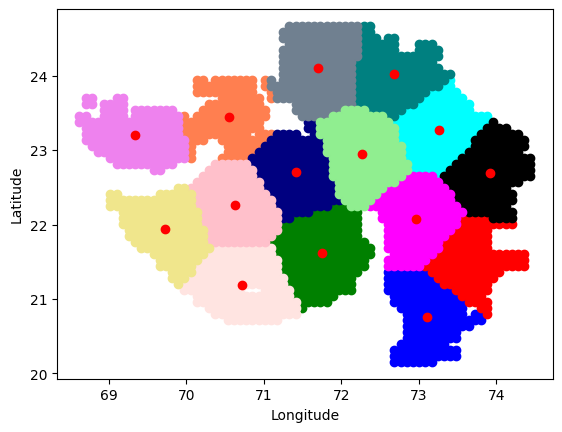

In [98]:
color=['blue','green','cyan', 'red', 'black', 'coral', 'mistyrose', 'teal', 'navy', 'violet', 'magenta', 'pink', 'slategrey', 'lightgreen', 'khaki', 'gold', 'darkturquoise']
for k in range(K):
    data=df_2018[df_2018["Cluster"]==k+1]
    plt.scatter(data["Longitude"],data["Latitude"],c=color[k])
plt.scatter(Centroids["Longitude"],Centroids["Latitude"],c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


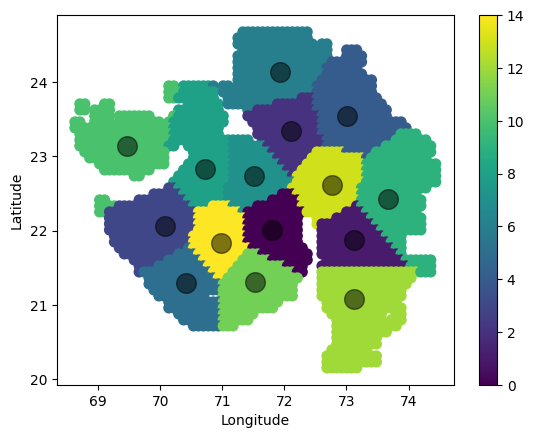

In [118]:
# K_clusters = range(5,25)
# kmeans = [KMeans(n_clusters=i) for i in K_clusters]
# lat_long = df_2018[['Longitude', 'Latitude']]
# lot_size = df_2018['2018']
# score = [kmeans[i].fit(lat_long, sample_weight = lot_size).score(lat_long) for i in range(len(kmeans))]
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve = Weighted')
# plt.show()

kmeans = KMeans(n_clusters = 15, max_iter=1000, init ='k-means++')
lat_long = df_2018[['Longitude', 'Latitude']]
lot_size = df_2018['2018']
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
df_2018['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = df_2018['cluster_label'] # Labels of each point
df_2018.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [12]:
import scipy.spatial

distance_matrix = pd.read_csv("dataset/Distance_Matrix.csv")
print(distance_matrix)

      Unnamed: 0         0         1         2         3         4         5   
0              0    0.0000   11.3769   20.4557   38.1227   45.3810   54.9915  \
1              1   11.3769    0.0000    9.0788   28.9141   36.1724   45.7829   
2              2   20.4557    9.0788    0.0000   22.3791   29.6374   39.2478   
3              3   38.1227   28.9141   22.3791    0.0000   11.8343   23.5413   
4              4   45.3810   36.1724   29.6374   11.8343    0.0000   11.7070   
...          ...       ...       ...       ...       ...       ...       ...   
2413        2413  671.2005  668.9528  669.5556  669.9084  652.1102  640.4032   
2414        2414  663.4455  661.1978  661.8006  662.1534  644.3551  632.6481   
2415        2415  663.7748  661.5271  662.1298  662.4826  644.6844  632.9774   
2416        2416  671.0165  668.7688  669.3715  669.7244  651.9261  640.2191   
2417        2417  679.2328  676.9851  677.5878  677.9406  660.1424  648.4354   

             6         7         8  ...

In [13]:
temp_distance_matrix = distance_matrix.copy()
temp_distance_matrix = temp_distance_matrix.drop('Unnamed: 0', axis = 1)
distance_array = temp_distance_matrix.to_numpy()

In [14]:
import numpy as np

In [15]:
data = df_2018.sort_values('2018', ascending=False)

In [16]:
print(len(data['Index'].unique()))

2418


In [56]:
def cluster_centroids(data, clusters, k, distance_matrix):
  results = []
  # print(clusters)
  for i in range(k):
    # print(list(np.asarray(data.iloc[clusters == i]['2018'])))
    # print(data.iloc[clusters == i]['Longitude'].tolist())
    # print(data.iloc[clusters == i]['Latitude'].tolist())
    curr_cluster_long = np.average(np.array(data.iloc[clusters == i]['Longitude'].tolist()), axis=0)
    curr_cluster_lat = np.average(np.array(data.iloc[clusters == i]['Latitude'].tolist()), axis=0)
    # print("{} : {}".format(curr_cluster_long, curr_cluster_lat))
    # print((clusters == i).tolist())
    cluster_list = data.iloc[clusters == i]['Index'].tolist()
    # print(cluster_list)
    curr_cluster_long_closest_value_index = min(cluster_list, key = lambda x : abs(curr_cluster_long - data.iloc[x]['Longitude']))
    curr_cluster_lat_closest_value_index = min(cluster_list, key = lambda x : abs(curr_cluster_lat - data.iloc[x]['Latitude']))
    # print("{} : {}".format(curr_cluster_long_closest_value_index, curr_cluster_lat_closest_value_index))
    first_data_point = curr_cluster_long_closest_value_index
    second_data_point = curr_cluster_lat_closest_value_index
    first_distance = 0
    second_distance = 0
    for i in data.iloc[clusters == i]['Index'].tolist():
      first_distance = first_distance + distance_matrix[i][first_data_point]
      second_distance = second_distance + distance_matrix[i][second_data_point]
    if(first_distance < second_distance):
      results.append(first_data_point)
    else:
      results.append(second_data_point)
  return results

In [57]:
def calculateDistance(centroids, data, distance_matrix):
  results = []
  current_capacity = [20000.0]*len(centroids)
  # print(centroids)
  for i in range(0, len(data)):
    temp = []
    min_centroid = 0
    for j in range(0, len(centroids)):
      if(current_capacity[j] - data.iloc[i]['2018'] > 0):
        temp.append(distance_matrix[i][centroids[j]])
        if(distance_matrix[i][centroids[min_centroid]] > distance_matrix[i][centroids[j]]):
          min_centroid = j
      else:
        temp.append(float('inf'))
    results.append(temp)
    # print(min_centroid)
    current_capacity[min_centroid] = current_capacity[min_centroid] - data.iloc[i]['2018']
  return np.array(results)

In [58]:
def kmeans(data, k=None, steps=100):
  # Forgy initialization method: choose k data points randomly.
  centroids = data.sample(k)['Index'].tolist()
  elbow = []
  # print(centroids)
  for _ in range(max(steps, 1)):
    distance = calculateDistance(centroids, data, distance_array)
    elbow.append(distance)
    #sse=np.sum((np.mean(elbow)-elbow)**2)
    # Index of the closest centroid to each data point.
    clusters = np.argmin(distance, axis=1)
    # print(set(clusters))
    # new_centroids = cluster_centroids(data, clusters, k)
    new_centroids = cluster_centroids(data, clusters, k, distance_array)
    if np.array_equal(new_centroids, centroids):
      break
    centroids = new_centroids
    # print(centroids)
  return clusters, centroids, elbow

In [37]:
cluster, centroids, elbow = kmeans(data, 15, 1000)

[1355, 1912, 861, 391, 414, 1663, 1214, 319, 1828, 479, 1721, 1388, 310, 594, 848]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[9 9 9 ... 8 8 8]
[672, 1044, 941, 1644, 340, 1585, 1423, 869, 1348, 1638, 473, 678, 1407, 1924, 1533]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[4 4 4 ... 6 2 2]
[1638, 554, 803, 285, 1807, 164, 447, 2081, 1585, 593, 1762, 1407, 1144, 1538, 73]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[14 14 14 ... 10 11  2]
[885, 1530, 876, 1638, 264, 2031, 934, 429, 1533, 1260, 1042, 299, 554, 436, 921]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[11 11 11 ...  2  2  2]
[743, 678, 351, 613, 1811, 185, 501, 1638, 736, 1533, 554, 860, 1216, 1274, 1002]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[5 5 5 ... 1 1 1]
[799, 381, 1203, 941, 1164, 1807, 1594, 792, 554, 1102, 1796, 1002, 620, 695, 549]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[1 1 1 ... 4 3 4]
[554, 1807, 1118, 1172, 1535, 1394, 1303, 1272, 1803, 620, 134, 299, 1274, 8

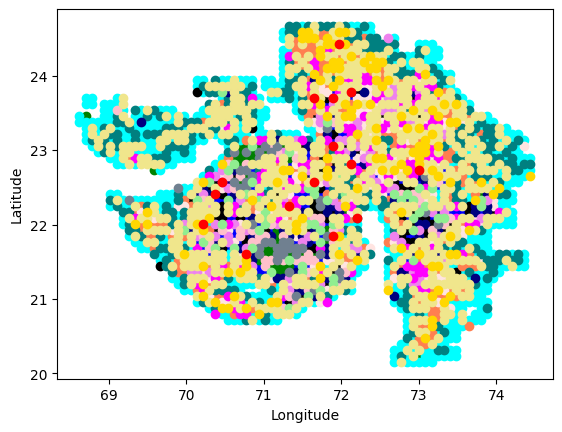

In [50]:
# memory = [[cluster, centroids, elbow]]
color=['blue','green','cyan', 'black', 'coral', 'mistyrose', 'teal', 'navy', 'violet', 'magenta', 'pink', 'slategrey', 'lightgreen', 'khaki', 'gold', 'darkturquoise']
data_clusters = data.copy()
data_clusters['cluster_label'] = cluster
for k in range(15):
    cluster_points = data_clusters[data_clusters['cluster_label'] == k]
    # print(cluster_points["Longitude"].to_numpy())
    # print(cluster_points["Latitude"].to_numpy())
    plt.scatter(cluster_points["Longitude"], cluster_points["Latitude"], c = color[k])
plt.scatter(data_clusters.iloc[centroids]["Longitude"], data_clusters.iloc[centroids]["Latitude"], c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [59]:
memory = dict()
memory[15] = tuple([cluster, centroids, elbow])
for i in range(16, 26):
    cluster, centroids, elbow = kmeans(data, i, 1000)
    memory[i] = tuple([cluster, centroids, elbow])

In [60]:
import pickle

In [61]:
with open('processing_clusters_dictionary.pickle', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
with open('processing_clusters_dictionary.pickle', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
vals = data[['Total','latitudes','longitudes']].values
sse=[]
for k in range(1,11):
    item = np.sum((v[2] - np.means(v[2]))**2)
    sse.append(item)
sse=sorted(sse,reverse=True)

In [ ]:
plt.plot(list(range(15, 26)), sse, 'b')
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylable('SSE distance')
plt.show()